##Desafío Evaluado 1
Expansiones Basales

##Ejercicio 1: Preparar el ambiente de trabajo
● Importe los módulos clásicos del trabajo en ciencia de datos.
● El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere
estadísticas descriptivas.
● En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de
las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la
librería pyGAM.

In [1]:

#Aspectos computacionales:
%matplotlib inline
import glob, os
os.chdir(r'C:\Users\arlen\Escritorio\DesafíoLATAM\Data Science\MachineLearning/SEM1/Apoyo Desafío - Expansiones basales')

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pygam import LinearGAM
from pygam import s
import lec1_graphs as afx
import lec2_graphs as afx
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('seaborn')
import sys
sys.path.append('../')

import cv_error as gfx
from cv_error import *

plt.style.use('ggplot')

from sklearn.model_selection import KFold
import sklearn.linear_model as lm

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')
print('Numero de filas: {0}'.format(df.shape[0]))
print('Numero de columnas: {0}'.format(df.shape[1]))


Numero de filas: 1030
Numero de columnas: 9


In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# solicitamos información sobre los atributos, podemos ver que no hay valor perdidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

##Ejercicio 2: Descripción
● El vector objetivo tiene el nombre de Concrete compressive strength(MPa,megapascals)
● Los nombres de las variables son muy poco amigables, dado que contienen
espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se
obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
● Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos.

En este caso nuestro vector objetivo será Concrete compressive strength(MPa, megapascals), y vamos a recodificar Concrete compressive strength(MPa, megapascals) como el logaritmo del Concrete compressive strength(MPa, megapascals) asociado.
Tambien vamos a estandarizar los demás atributos, ya que son numéricos
Primero renombraré las columnas a nombres mas cortos

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
df2=df.rename(columns= {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
                       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                       'Water  (component 4)(kg in a m^3 mixture)':'Water',
                       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
                       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age',
                       'Concrete compressive strength(MPa, megapascals) ':'ConcreteCS',}
              )

In [7]:
#Revisamos nuevamente las columnas
df2.columns


Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'ConcreteCS'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
# Normalizamos la variable Concrete 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
df_scaled['ConcreteCS'] = np.log(df_scaled['ConcreteCS'])


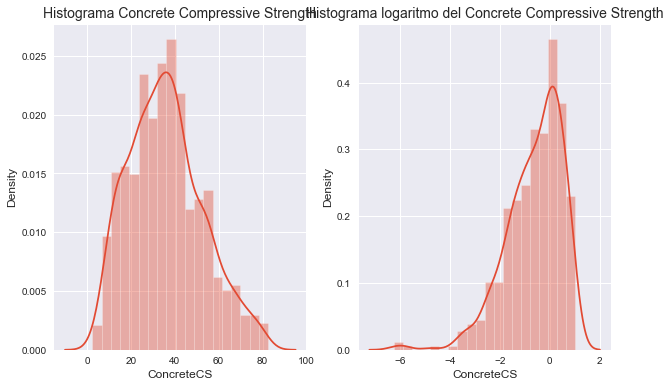

In [9]:
#Aquí vamos a evaluar como se comporta la distribución del precio con y sin logaritmo
fig , ax = plt.subplots(1,2)
sns.distplot(df2['ConcreteCS'], bins='fd',ax = ax[0])
ax[0].set_title('Histograma Concrete Compressive Strength', size = 14)
sns.distplot(df_scaled['ConcreteCS'], bins = 'fd', ax = ax[1])
ax[1].set_title('Histograma logaritmo del Concrete Compressive Strength', size = 14);

En el histograma sin logaritmo, se ve una distribución que se acerca a la normalidad el cual sirve más para implementar nuestros modelos de regresión, en cambio en el histograma con logaritmo se ve una distribución sesgada hacia valores mayores.
Lo que nos hace pensar que no es necesario normalizar los datos. Trabajaremos conn df2 en adelante.

Text(0.5, 1.0, 'Boxplot log-Concrete Compressive Strength')

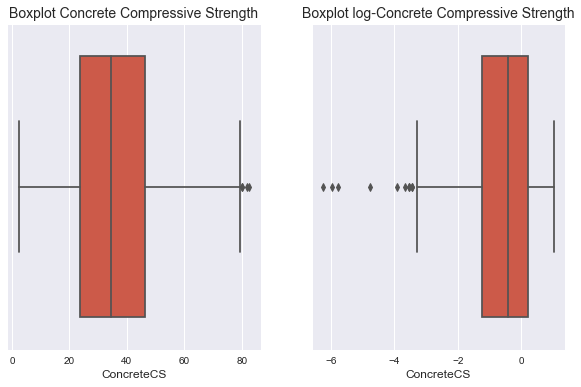

In [10]:
plt.subplot(1, 2, 1)
sns.boxplot(df2['ConcreteCS'], orient='v').set_title('Boxplot Concrete Compressive Strength', size=14);
plt.subplot(1, 2, 2)
sns.boxplot(df_scaled['ConcreteCS'], orient='v').set_title('Boxplot log-Concrete Compressive Strength', size=14)

##Ejercicio 3: Modelo
● En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional
a esto, importe las métricas de desempeño asociadas.
● Genere conjuntos de entrenamiento y validación.
● Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper
parámetro lam así como las métricas de desempeño asociadas.
● Genere un segundo modelo implementando gridsearch en lambda con un
logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de
desempeño.

#Regresión Ridge

Un modelo OLS puede sufrir de coeficiente inflados, conllevando a overfit en la muestra de entrenamiento.
Ridge modifica la superficie de penalización de los coeficientes mediante el hiperparámetro lambda.
Lambda gobierna la superficie de penalización que está determinada por la cantidad de parámetros inferidos en el modelo.
DAdo que tiene una forma cuadrática, suaviza pero no elimina atributos irrelevantes.

Un hiperparámetro va a ser todo aquel elemento ingresado dentro de un algoritmo de machine learning el cual no está definido de forma implicita por el modelo en si, sino que depende del usuario.
Vamos a ver la técnicas para decidir cuál va a ser nuestro mejor hiperparámetro.

In [11]:
#Elección del hiperparámetro: se prueba distintas combinaciones de éstos.
#Se evaluará lambda en distintos conjuntos de datos con especificaciones de modelos distintas (se trabaja con el MSE)
#Se saca un promedio del error cuadrático promedio para este conjunto de datos específico, para ello posteriormente, vamos a
#rankiar en función a todas las configuraciones (lambda = 0.001, 0.01, 0.05 y 0.1) de parámetros y datos cuál va a ser el mejor
#modelo.   Ahora implementaremos la búqueda del hiperparámetro lambda en nuestro mosdelo ridge


In [12]:
#Primero se importan las principales librerias para nuestro modelo ridge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error

# X será nuestro conjunto de atributos. y será nuestra variable objetivo
X = df2.iloc[:, :-1] # Tomamos todas las columnas menos la última(ConcreteCS)
N = X.shape[0] # guardamos el número de filas (datos de entrenamiento) en un objeto llamado N
#le incorporamos un intercepto a este conjunto de datos
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df2['ConcreteCS'] # asignamos como target la variable 'ConcreteCS'
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 63)

In [13]:
#Chequeamos para ver las dimensiones
X_train.shape

(690, 9)

In [14]:
y_test.shape

(340,)

In [15]:
X_test.shape

(340, 9)

In [16]:
y_train.shape

(690,)

In [17]:
#Ahora buscaremos los hiperparámetros

#Incorporamos un nuevo objeto llamado alpha

In [18]:
alphas = np.logspace(0, 7, base = 10) # generamos un vector con los valores de la norma

In [19]:
#Cada uno de los valores resultantes van a ser los valores que vamos a estar validando de forma cruzada, 
#para la elección del mejor hiperparametro
alphas

array([1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03, 1.38949549e+03, 1.93069773e+03,
       2.68269580e+03, 3.72759372e+03, 5.17947468e+03, 7.19685673e+03,
       1.00000000e+04, 1.38949549e+04, 1.93069773e+04, 2.68269580e+04,
       3.72759372e+04, 5.17947468e+04, 7.19685673e+04, 1.00000000e+05,
       1.38949549e+05, 1.93069773e+05, 2.68269580e+05, 3.72759372e+05,
       5.17947468e+05, 7.19685673e+05, 1.00000000e+06, 1.38949549e+06,
       1.93069773e+06, 2.68269580e+06, 3.72759372e+06, 5.17947468e+06,
       7.19685673e+06, 1.00000000e+07])

In [20]:
#Guardamos los nombres de los regresores
names_regressors = X_train.columns # guardamos los nombres de los atributos
# y generamos dos objetos coefs_ridge y cv_err_ridge
coefs_ridge = [] #lista para guardar parámetros
cv_err_ridge = [] #lista para guardar parámetros

model_ridge = Ridge(fit_intercept = True) # instanciamos el modelo base
tol = 0.1 # determinamos el umbral de tolerancia para cada valor en el vector

In [21]:
y_arr.shape

NameError: name 'y_arr' is not defined

In [ ]:
alphas.shape

In [ ]:
for a in alphas:
# estimamos el modelo con éste
    model_ridge.set_params(alpha = a) #esto es para actualizar temporalemte los parametros llamando a alpha = a 
    model_ridge.fit(X_train, y_train)  #Ya con el modelo entrenado, guardamos los coeficientes de
# guardamos el coeficiente estimado
    coefs_ridge.append(model_ridge.coef_) #sacamos del modelo ya instanciado y entrenado el nombre del coeficiente .coef_
# generamos su estimado de validación cruzada. y separamos en base a la función definida en el archivo auxiliar el dummy y el cv_error
    dummy,cv_err_estimates = cv_error(X_train, y_train, k=10, method='ridge', alpha=a) #con esto guardamos dos elementos,
    #por un lado vamos a estar guardando el valor de cada uno de los coeficientes de nuestro modelo regularizado y tambien
    #vamos a estar guardando el error de validación cruzada de cada uno de estos modelos
    cv_err_ridge.append(np.mean(cv_err_estimates)) # OJO: estamos guardando la media del error(del promedio cuadrático) de cv para cada alpha


In [ ]:
#Ahora vamos a graficar y ver como se comportan cada uno de estos coeficientes en los modelos entrenados
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label = label)
    
plt.legend()
plt.xscale("log")
plt.title("Ridge Regression: coeficientes vs par. de regularización", size = 14)
plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')
plt.axis("tight")
plt.legend(loc="center left", bbox_to_anchor=(1, .5));

In [ ]:
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_ridge),"o-", color='dodgerblue')
ax.set_xscale('log')
plt.xscale("log")
plt.title("Ridge Regression: RMSE de Cross-Validation para cada $\lambda$", fontsize = 14);

In [ ]:
alphas_ = np.logspace(0, 7, base = 10)
#La función ridge_cv ahorra trabajo emn la elección de nuestto hiperparametro
#Se le pasan la cantidad de validaciones cruzadas existentes
ridge_cv = RidgeCV(cv = 10)
#hacemos esl modelo ridge_cv
model_ridge = ridge_cv.fit(X_train, y_train)

In [ ]:
#para ver cuañl es el mejor hiperparametro que regularizará nuestro modelo de regresion, hacemos "model_ridge.alpha_
#Esto me resulta 10, entonces:
#Cuando tengamos un alpha de 10, el comportamiento va a ser el adecuado
#Este principio se guia de acuerdo al early stoping: buscamos el máximo parametro antes de que nuestra función
#comience a ser ineficiente.
model_ridge.alpha_

In [ ]:
#Ahora con model_ridge.coef_ podemos ver cual va a ser el comportamiento en especifico de cada uno de nuestros regresores
# en base a este alpha
model_ridge.coef_

In [ ]:
#Métricas
ridge_rmse = np.sqrt(mean_squared_error(model_ridge.predict(X_test), y_test))
ridge_mae = median_absolute_error(model_ridge.predict(X_test), y_test)

In [ ]:
#Ahora para tener un mejor sentido de como se comporta esto, vamos a incorporar una metrica de nuestro r cuadrado
from sklearn.metrics import r2_score
#Vamos a evaluar el mejor comportamiento de la mejor combinación de hiperparámetros enn base a el model_ridge en el conjunto de validación
print(r2_score(model_ridge.predict(X_test), y_test)) # esto me va a resultar el coeficiente de validación
#De esta manera el coef de validación nos dice que con un alpha de 10, nuestro modelo va a tener cerac de un 44% en 
#predecir o expplicar la varianza de los puntajes de nuestro vector objetivo de validación

Para concluir podemos decir que ridge, por defecto, no busca seleccionar atributos, es decir, solo sirve para regularizar y disminuir el peso desmedido de cada uno de ellos
Sin embargo, Lasso, ademas de permitir regularizar, nos permite seleccionar atributos

In [ ]:
def report_regularization(model, X_test, y_test):
    print('Valor del parámetro de regularización:{0}'.format(model.alpha_))
    print('Coeficientes finales: \n{0}'.format(model.coef_))
    y_hat = model.predict(X_test)
    print('R-squared: {0}'.format(r2_score(y_test,y_hat)))
    print('Mean Squared Error: {0}'.format(mean_squared_error(y_test,y_hat)))

In [ ]:
report_regularization(ridge_cv, X_test, y_test)

In [ ]:
#Descripción modelo
print(f"Valor parámetro de regularización: {model_ridge.alpha_}")
print(f"Coeficientes finales: {model_ridge.coef_}")
print(f"RMSE de pruebas: {ridge_rmse:.2f}")
print(f"MAE de pruebas: {ridge_mae:.2f}")

##Lasso:  Least Absolute Shrinkage and Selection Operator

Este modelo permite eliminar atributos irrelevantes del modelo.
Al igual que en Ridgee, el hiperparámetro en el que debemos fijarnos es lambda, el cual va a definir el área de la superficie de penalización

Norma L1

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

names_regressors = X.columns


In [ ]:
#generamos un nuevo objeto
coefs_lasso = []
cv_err_lasso = []
model_lasso = Lasso(fit_intercept = True)

In [ ]:

alphas_ = np.logspace(0, -3, base = 10)
for a in alphas_:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(X_train, y_train)
    coefs_lasso.append(model_lasso.coef_)
    dummy,cv_err_estimates = cv_error(X_train,y_train,k = 10, method = 'lasso', alpha = a)
    cv_err_lasso.append(np.mean(cv_err_estimates))

In [ ]:
#Acá vamos a evaluar el comportamiento de los coeficientes
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_lasso).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)
plt.legend()
plt.xscale('log')
plt.title("Lasso Regression: coeficientes vs par. de regularización", fontsize = 14)
plt.axis("tight")
plt.legend(loc = "center left", bbox_to_anchor=(1, .5));

Una de las principales diferencas entre lasso y ridge es que en el gráfico se puede observar que lasso tiende a sancionar de una manera mucho más fuerte en comparación con ridge.
Ridge tiende a entregar soluciones más suavisadas, debido a su forma cuadrática, sin embargo, lasso tiende a entregar soluciones, que una vez que el coeficiente comienza a presentar cierto efectyo en la regularización, éste de maera irrestricta tenderá a bajar. Sin embargo nuestro gráfico no baja.

In [ ]:
#Ahora evaluaremos el comportamiento de los hiperparámetros en el error de entrenamiento.
plt.plot(alphas_, np.sqrt(cv_err_lasso),'o-',color='dodgerblue')
plt.xscale("log")
plt.title("Lasso Regression: RMSE Cross-Validation para cada $\lambda$",fontsize = 14);
#Lo que podemos encontrar en el gráfico es que el mejor hiperparámetro de lambda se va a posicionar en la región cercana al 
#10elevado a -1, debido a que es antes de ese número que despues comienza a dispararse el error cuadrático promedio

In [ ]:
#alphas_ = np.logspace(0, -3, base = 10)
#Vamos a implementar el modelo lasso en variante cv
lasso_cv = LassoCV()
#entrenamos nuestro modelo
model_lasso = lasso_cv.fit(X_train, y_train)

In [ ]:
#preguntamos por el mejor alpha  del modelo
model_lasso.alpha_


In [ ]:
#Ahora cosultamos por los mejores coeficientes asociados a este mejor alpha
model_lasso.coef_ 
#Podremos notar que hay elementos que se posiconan cercanos al cero, y estos serán eliminados posteriormente en las
#fases de entrenamiento de los siguientes modelos

In [ ]:
#Ahora evaluaremos el comportamiento de lasso en r cuadrado
print(r2_score(model_lasso.predict(X_test), y_test))
#Podemos notar que aunque ambos modelos presentan una combinacion de hiperparamtros distinta, hasta ahora esto presenta un
#desempeño similar de un 43% el anterior se aproximó un poco más a un 44%

In [ ]:
#Métricas
lasso_rmse = np.sqrt(mean_squared_error(model_lasso.predict(X_test), y_test))
lasso_mae = median_absolute_error(model_lasso.predict(X_test), y_test)


In [ ]:
#Descripción modelo
print(f"Valor parámetro de regularización: {model_lasso.alpha_:.2f}")
print(f"Coeficientes finales: {model_lasso.coef_}")
print(f"RMSE de pruebas: {lasso_rmse:.2f}")
print(f"MAE de pruebas: {lasso_mae:.2f}")

Elastic Net_

El problema de ridge es que no es capaz de hacer una selección de atributos efectiva, dado que nunca hace exactamente cero los coeficientes.
El problema de lasso, es que a veces es muy agresivo en la reduccion de atributos.
El modelo de Elastic Net es una mezcla  de ridge y Lasso, y éste trata de quedarse con lo bueno de amnbos:

-combina ambas normas de penalización, el primer elemento correspondeinte a la norma L1 de lasso, nos va a asegurar una buena seleccion de atributos, L2 nos va a asegurar una penalización parsimoniosa de los coeficientes de los atributos, sin ser muy agresiva (ridge).
-aparte del parametro lambda que va a gobernar el tamaño o la superficie de panalizaacion, va existir un parámetros que va a gobernar la dominancia entre ambas formas de penalización.

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

#names_regressors = X.columns
alphas = np.logspace(0, -3, base = 10)

In [ ]:
coefs_elastic_net = []
cv_err_elastic_net = []
model_elastic_net = ElasticNet(fit_intercept = True)

for a in alphas:
    model_elastic_net.set_params(alpha = a)
    model_elastic_net.fit(X_train, y_train)
    coefs_elastic_net.append(model_elastic_net.coef_)
    dummy,cv_err_estimates = gfx.cv_error(X_train,y_train,k = 10, method ='enet', alpha = a)
    cv_err_elastic_net.append(np.mean(cv_err_estimates))


In [ ]:
#Evaluaremos el comportamiento de elastic net en los coeficientes
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_elastic_net).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)
plt.legend()
plt.xscale("log")
plt.title("Elastic Net Regression: coeficientes vs par. de regularización", fontsize = 14)
plt.axis("tight")
plt.legend(loc = "center left", bbox_to_anchor=(1, .5));

#Por defecto la dominancia entre ambas normas de penalización tiende a ser 1 es a 1, de esta manera, si observamos el gráfico
#podemos ver que si bien tienenden a declinar el valor de cada unpo de los valores en los atributos, el decline tiende a ser
#mucho mas suave, de esta manera, se nota el compromiso existente entre la norma L1 que permite seleccionar atributos
#y la norma L2 que permite suavizar estos mismo atributos

In [ ]:
#Ahora evaluamos el rango de hiperparámetros, veremos que tienen un comportamiento similar al que obtuvimos con lasso,
#esto es dado al rango de hiperparametros que selaccionamos
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_elastic_net),'o-', color='dodgerblue')
ax.set_xscale('log')
plt.title("Elastic Net Regression: RMSE Cross-Validation para cada $\lambda$", fontsize = 14);


In [ ]:
#Evaluaremos cual es la mejor combinaci+on de nuestros modelos
alphas_ = np.logspace(0, -3, base = 10)
elastic_cv = ElasticNetCV(cv = 10)
model_elastic_net = elastic_cv.fit(X_train, y_train)
#report_regularization(model_elastic, X_test, y_test)

In [ ]:
#Implementamos 
model_elastic_net.alpha_
#Y podemos notar que el comportamiento de elastic-net tiende a cercarse más al modelo de lasso

In [ ]:
#Ahora veamos los coeficientes que nos entrega elastic net
model_elastic_net.coef_
#Y como podemos observar tiende a penalizar de manera muy parecida a lasso, pero si detallamos cada coef, podriamos notar
#que estos tienen un comportamiento más parecido a ridge

In [ ]:
#Ahora veremos el r cuadrado
r2_score(model_elastic_net.predict(X_test), y_test)
#Este resultado es casi igual a lo que desarrollamos anteriomenrte

In [ ]:
#Métricas
enet_rmse = np.sqrt(mean_squared_error(model_elastic_net.predict(X_test), y_test))
enet_mae = median_absolute_error(model_elastic_net.predict(X_test), y_test)


In [ ]:
#Descripción modelo
print(f"Valor parámetro de regularización (mejor alpha): {model_elastic_net.alpha_:.2f}")
print(f"Coeficientes finales: {model_elastic_net.coef_}")
print(f"RMSE de pruebas: {enet_rmse:.2f}")
print(f"MAE de pruebas: {enet_mae:.2f}")

In [ ]:
#Gráfico métricas

plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

plt.subplot(1, 2, 1)
plt.plot(['ridge', 'lasso', 'enet'], [ridge_mae, lasso_mae, enet_mae], 'o')
plt.axhline(np.mean([ridge_mae, lasso_mae, enet_mae]), color='tomato')
plt.ylim(1, 10)
plt.title('Median Absolute Error')

plt.subplot(1, 2, 2)
plt.plot(['ridge', 'lasso', 'enet'],[ridge_rmse, lasso_rmse, enet_rmse], 'o')
plt.axhline(np.mean([ridge_rmse, lasso_rmse, enet_rmse]), color='tomato')
plt.ylim(5, 15)
plt.title('Root Mean Squared Error');

In [ ]:
#Con este gráfico comparamos los coeficientes
comparecoefs = pd.DataFrame({'ridge':model_ridge.coef_, 'lasso':model_lasso.coef_, 'enet':model_elastic_net.coef_})
comparecoefs['coefs'] = df2.columns.drop('ConcreteCS')
plt.plot(comparecoefs['ridge'],comparecoefs['coefs'], 'o',label='Ridge', markersize=10)
plt.plot(comparecoefs['lasso'],comparecoefs['coefs'], '^', alpha=.5,label='Lasso', markersize=12)
plt.plot(comparecoefs['enet'],comparecoefs['coefs'], 's', alpha=.5,label='Elastic Net', markersize=13)
plt.axvline(0, color='red')
plt.xlabel(r'Model coefs given optimized $\lambda$');
plt.legend()
plt.title(r'$\beta$ en cada modelo' );

##Conclusiones
De acuerdo a las métricas MAE y RMSE, los tres modelo presentan un desempeño similar. ElasticNet, presenta los valores más bajos en RMSE = 10.55, sin embargo presenta el valor más alto en el MAE = 6.37.



Introducción a GAMS_

Modelos Aditivos Generalizados

Acá veremos una forma especifica de solucionar el subajuste dado que nuestras funciones proyectadas sean no lineanes

El problema de la nolinealidad, Soluciones a la nolinealidad:
-Una de las primeras soluciones es transformar la regresión lineal en una regresión polinomial, mediante la inclusion de términos cuadráticos, así generaremos un mejor acople en nuestros datos de entrenamiento. El problema de generar este mejor acople, es que reduce la capacidad de generalización del modelo en nuevos datos.
-La solución de los GLM (MOdelos lineales Generalizados) nos permite suavizar o generar no linealidades en nuestra variable dependiente. El principal "pero" de generar modelos lineales generalizados es que flexibiliza el proceso de generación de datos, pero sigue siendo lineal.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lec2_graphs as afx
import pygam
import warnings

warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos
sns.set_style('darkgrid')


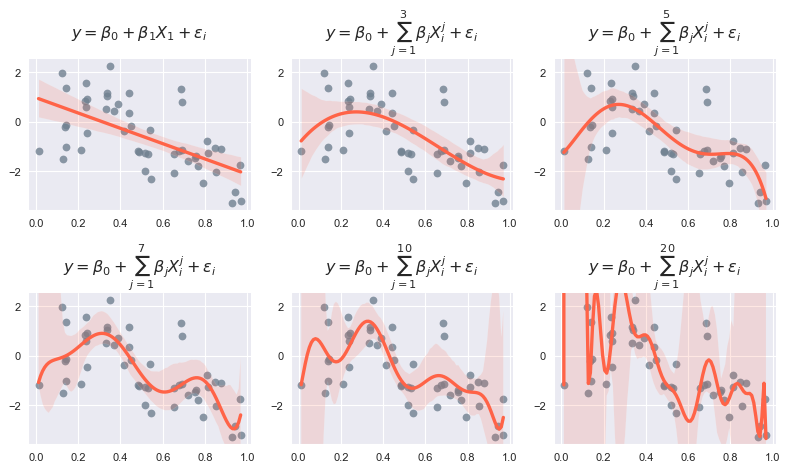

In [23]:
afx.polynomial_degrees()

La figura generada con afx.polynomial_degrees() presenta la recta de ajuste en una
serie de datos con una fuerte no linealidad. Cada uno de los gráficos representa la inclusión
de términos en el lado derecho de la ecuación. La cantidad de términos está representado
con el operador

Solución propuesta por GAM

Mediante la inclusión de la función de vínculo g(E(Y)), podemos flexibilizar el comportamiento de nuestro vector objetivo.
La combinación lineal de parámetros nos asegura cierta estabilidad en la identificación de los resultados.
La función de identidad especifica permite flexibilizar el comportamiento de splines en cada parámetro.

La forma de los GAM es muy similar a la de un modelo lineal, pero en el modelo lineal todas las funciones fi(xi) vendrian siendo funciones de identidad que serian los betas. En cambio los GAM utiliza distintas funciones identidad para tratar de distintas maneras ciertos atributos a traves de funciones no lineales. Estas no linealidades permitiran a la curva de regresión responder de manera mucho mas flexible a la oscilación periodica o fluctuaciones en nuestra variable objetivo y nuestros atributos.

Obtención de parámetros y optimización de GAM: Implementación y entrenamiento

Entrenamiento de GAM: su objetivo es estimar jfunciones de identidad y como nos aseguramos de que estas van a ser óptimas

Obtención de la función identidad: se realiza mediante el algoritmo del backfitting. Este asume que tenemos un parámetro no identificable, es decir, que no tiene solución única. Comienza igualando el prámnetro al promedio de observaciones "y" (nuestro vector objetivo). Luego en base a este parámetro promedio, vamos a probar una función de suavización (Gaussian Kernel, termino de spline, algun termino polinomial, etc...) en x para estimar una actualización de la identidad.
Entonces actuqlizamos el parámetro en base a este punto. E iteraremos hasta que el compotamentento de f se estabilice, o se alcance algún criterio de tolerancia.

Ahora ¿Cómo optimizamos este modelo?
-Evaluamos el puntaje predicho a nivel de cada función de identidad generada para una observación.
-Evaluamos la desviación entre lo predicho y lo observado a nivel de muestra de entrenamiento.
-Regularizamos la suavización de la función (trade off entre una penalización y un spline propuesto por el algoritmo). Este penalizador, penalizará la concavidad del spline, si es que tenemos un spline muy exagerado, este se penalizará más.
El factor lambda va a ser el trade off entre la concavidad del spline propuesto y la penalización asignada: mientras más alto sea el hiperparámetro más se penalizará el modelo por las splines que sean curvas y tenderá a tener splines mas rectas.
-La penalización a la segunda derivada responde para evitar el overfit al cual tienden a generar los splines
-Finalmente evaluaremos aquella función candidata que minimice este error cuadrático regularizado.


In [24]:
#pyGAM
from pygam import LinearGAM
from pygam import s
import lec2_graphs as afx
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('seaborn')

In [25]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [27]:
# Vamos a eliminar ciertas columnas que son irrelevantes para nuestro analisis
#df.drop(['zipcode', 'id', 'date'], axis = 1, inplace = True)

# Vamos a utilizar un subconjunto de las columnas para hacer el ejemplo mas expedito
#sub = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
df2=df.rename(columns= {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
                       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                       'Water  (component 4)(kg in a m^3 mixture)':'Water',
                       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
                       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age',
                       'Concrete compressive strength(MPa, megapascals) ':'ConcreteCS',}
              )

In [28]:
# X será nuestro conjunto de atributos e y será nuestra variable objetivo
X_train_pre, X_test_pre, y_train, y_test = train_test_split(df2, df2['ConcreteCS'], test_size =.3, random_state = 63)

# Ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)

In [29]:
# Con el estandarizador ajustado sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns =X_train_pre.columns)

# Transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns =X_test_pre.columns)


In [30]:
from pygam import LinearGAM
from pygam import s

# definimos el rango de hiperparametros a evaluar
lam = np.logspace(-3, 3, 3)
lam

array([1.e-03, 1.e+00, 1.e+03])

In [31]:
# Necesitamos generar copias de esta lista de valores a evaluar para cada funcion f(X), que en nuestro caso serán splines
lams = [lam]* 4
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [32]:
# Definimos el modelo indicandole qué tipo de función debe tratar de ajustar a cada atributo/variable independiente
#en la matriz que le entregaremos: s(0) significa que se debe ajustar un término de tipo spline a la primera columna entregada
gam = LinearGAM(s(0) + s(1) + s(2)+ s(3), fit_intercept=True)

In [33]:

# Realizamos el proceso de búsqueda por gridsearch invocando al método del mismo nombre
gam.gridsearch(X_train.values, y_train.values, lam = lams)


100% (81 of 81) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [34]:

# Con el método summary obtenemos una tabla con los resultados del ajuste del modelo para la mejor combinación de hiper parámetros
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.0157
Link Function:                     IdentityLink Log Likelihood:                                 -4234.7004
Number of Samples:                          721 AIC:                                             8507.4323
                                                AICc:                                            8508.5183
                                                GCV:                                              147.9531
                                                Scale:                                            141.3138
                                                Pseudo R-Squared:                                   0.5179
Feature Function                  Lam

Test R^2: 0.504
Test RMSE: 243684.196
Test Median Absolute Error:120633.493


##Métodos de Dependencia Parcial

Para observar los gráficos de la variable dependiente con respecto a la variable independiente, vamos a hacer una grilla

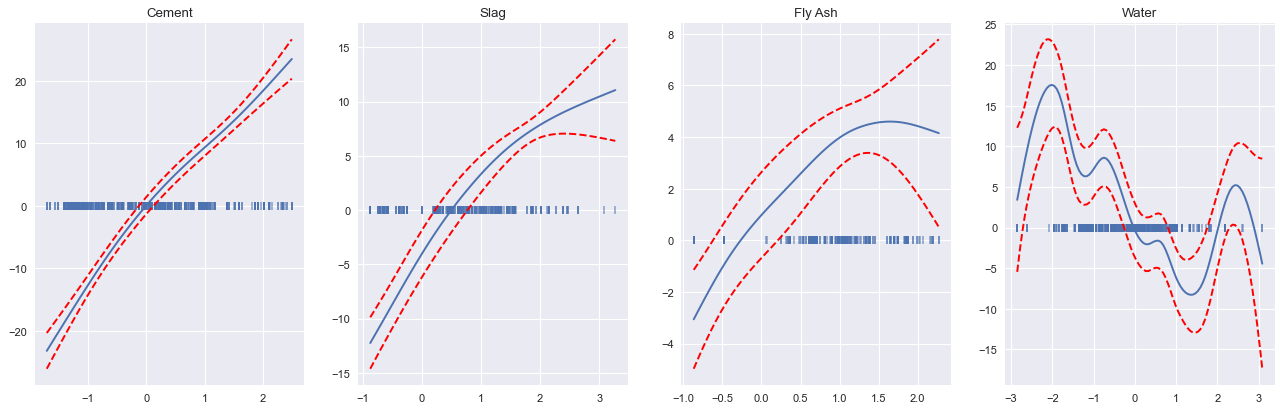

In [35]:
fig, axs = plt.subplots(1,4, figsize = (20,6)) #hacemos una grilla con una fila y 4 columnas

titles = X_train.columns

for i, ax in enumerate(axs.flatten()):
    
    XX = gam.generate_X_grid(term=i)   #esto muestra 100 puntos igualmente espaciados en el eje X, donde los terminos son la splines
   
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX)) #luego graficamos en el eje X, pero con el método partial_dependence, 
    #que computa el  valor de la spline ajustada para ese término (esto nos da la altura que tomaría la función de dependencia partial 
    #para cada uno de los puntos X=XX en el eje X)
    
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--') # Esta linea hace algo similar, 
    #sólo qeu ahora le estamos pidiendo que nos de el intervalo de confianza con un 95% de confianza, color rojo y tipo de linea
    
    ax.scatter(X_train[titles[i]],[0] * len(X_train[titles[i]]), marker = '|', alpha = .5) # Este gráfico me va a marcar en el eje X
    #donde estan los puntos de datos sopbre los cuales se entrenó la spline
    
    ax.set_title(titles[i]);


##Modificación de Hiperparámetros en GAM

In [36]:
new_gam = LinearGAM(lam = 1e6).fit(X_train, y_train)  #aquí se puede entregar directamengte un valor de lambda (lam=1e6) 
#que penalice de igual forma todas las splines. Para esto, instancioamos nuestro modelo LinearGAM, entregamos el valor de
#lambda que queremos que ocupe para todas las splines (lam=1e6 en este caso) o todos los términos de nuetra forma funcional
# y lo ajustamos directamente con .fit(X_train, y_train) sin necesidad de hacer gridsearch, porque ya le estamos pasando el 
#valor de lambda específicamente. Y esto lo guardaremos en el objeto llamado new_gam.

In [37]:
#Ahora crearemos la función report_gam_metrics, que calculará el RS2, el MSE y el Median Absolute Error para nuestro modelo
def report_gam_metrics(model, X_test, y_test):
    preds = model.predict(X_test)
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error:{0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))


In [38]:
#Esto lo ocupamos para medir el performance en conjunto de test con nuestra gam con gridsearch y nuestra lambda entrenada
#con este valor de gamma bastante grande
print(f'Métricas para el primer modelo entregado con lambda: {gam.lam}\n')
report_gam_metrics(gam, X_test, y_test)
print(f'Métricas para el primer modelo entregado con lambda: {new_gam.lam}\n')
report_gam_metrics(new_gam, X_test, y_test)

Métricas para el primer modelo entregado con lambda: [[1000.0], [1000.0], [1000.0], [1.0]]

Test R^2: 0.486
Test RMSE: 11.601
Test Median Absolute Error:8.248
Métricas para el primer modelo entregado con lambda: [[1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0], [1000000.0]]

Test R^2: 1.0
Test RMSE: 0.0
Test Median Absolute Error:0.0


Como podemos observar, en el segundo modelo, ocupa los mismos lambdas de 1000000 en cada spline, lo que no sucede en el primero  que los valores que ocupa son los encontrados por el grid_search.
Si nos fijamos en el R2 podemos notar una pequeña disminución en el performance, ya que su valor disminuyó. Y el Median absolute error aumentó al igual que el MSE. 

###Ahora veamos la forma funcional que encontró este nuevo modelo con una penalización extrema hacia la concavidad:

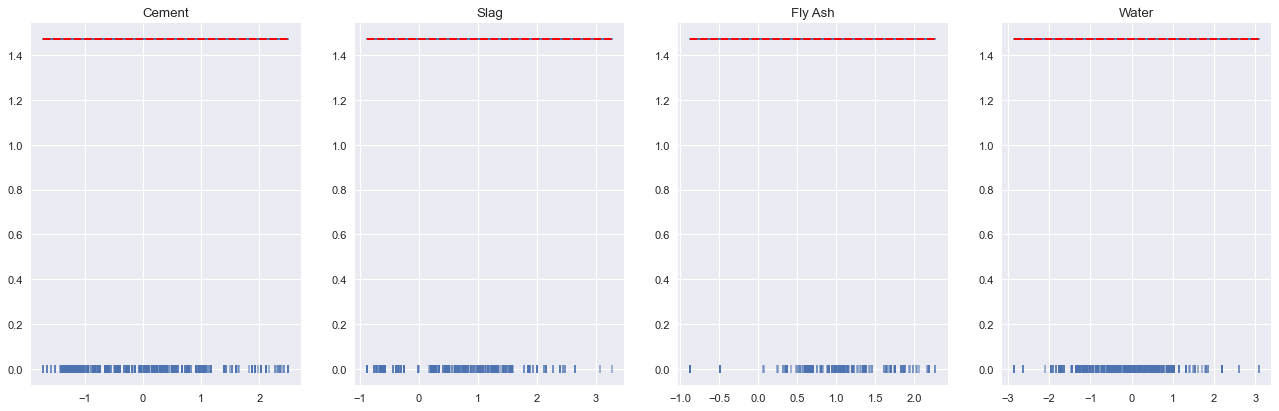

In [39]:
#Repetimos el for anterior para graficar ahora el new_gam
fig, axs = plt.subplots(1,4, figsize = (20,6));
titles = X_train.columns

for i, ax in enumerate(axs.flatten()):
    XX = new_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], new_gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], new_gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
    ax.set_title(titles[i]);

Al penalizar tan fuerte la concavidad de las splines, la única solución que le queda a los modelos es ajustar rectas para todos. (Esto suele ocurrir en la mayoría de los métodos de regularización: cuando unno penaliza demasiado un modelo, el modelo suele tender a caer en casos triviales en subparametrizaciones, a casos en las que la hipótesis, la forma funcional del modelo se hace demasiado simple, que al penalizarlo tan fuerte, tiene la incapacidad de moverse por el espacio que tiene que buscar.)
Acá el modelo cayó en simplemente rectas, porque le penalizabamos mucho a la concavidad de las splines, que fue mucho mejor simplemente ajustar rectas para todo.
Por lo tanto, OCUPAR EL PARÁMETRO LAMBDA NO ES TRIVIAL, y por esto tiene sentido ocupar el grid search.

In [40]:
new_gam.summary()
#EDoF son los grados de libertad, mientras mas penalice, menos grados de libertad voy a tener

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      10.037
Link Function:                     IdentityLink Log Likelihood:                      -4.53531364446961e+17
Number of Samples:                          721 AIC:                                  9.07062728893922e+17
                                                AICc:                                 9.07062728893922e+17
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam